<a href="https://colab.research.google.com/github/utkarsh-prakash/Time-Series-Modelling/blob/main/Timeseries_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structuring data for Time-Series Analysis

In [1]:
!pip install download

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")

Import Succesfull


In [3]:
# Air quality for multiple location of China
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/tmp/aq', kind="zip")

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [4]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Feb 14 04:49 ..
-rw-r--r-- 1 root root 2835916 Feb 14 04:49 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Feb 14 04:49 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Feb 14 04:49 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Feb 14 04:49 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Feb 14 04:49 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Feb 14 04:49 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Feb 14 04:49 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Feb 14 04:49 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Feb 14 04:49 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Feb 14 04:49 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Feb 14 04:49 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [5]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', 
                    parse_dates=[['year','month','day','hour']], 
                    date_parser=convert_to_date, 
                    keep_date_col=True)
aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [7]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [8]:
# In future if we want to do some month/day level analysis]
aq_df['year'] =  pd.to_numeric(aq_df['year'])
aq_df['month'] =  pd.to_numeric(aq_df['month'])
aq_df['day'] =  pd.to_numeric(aq_df['day'])
aq_df['hour'] =  pd.to_numeric(aq_df['hour'])
print("Rows     :", aq_df.shape[0])
print("Columns  :", aq_df.shape[1])
print("\n Features \n", aq_df.columns.to_list())
print("\n Missing Values \n", aq_df.isnull().any())
print("\n Unique Values \n", aq_df.nunique())

Rows     : 35064
Columns  : 19

 Features 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

 Missing Values 
 year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

 Unique Values 
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5               

In [9]:
aq_df.isnull().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

In [10]:
aq_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [11]:
aq_df_non_indexed = aq_df.copy()
# The main advantage of indexing is we can query it very fast
# We can do a lot of subsetting and filtering
# A lot of plots needs indexed data
aq_df = aq_df.set_index('year_month_day_hour')

In [12]:
# How we can pull data with string dates
# follow yyyy-mm-dd if date column is datetime64[ns]
aq_df.loc['2013-03-01':'2013-03-05']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-05 19:00:00,116,2013,3,5,19,179.0,200.0,50.0,96.0,1600.0,82.0,7.7,1005.4,-7.6,0.0,NNE,0.2,Dingling
2013-03-05 20:00:00,117,2013,3,5,20,172.0,180.0,43.0,94.0,1899.0,82.0,6.3,1005.9,-7.3,0.0,NNE,0.7,Dingling
2013-03-05 21:00:00,118,2013,3,5,21,179.0,191.0,38.0,80.0,1700.0,82.0,5.6,1006.0,-7.3,0.0,NNE,0.2,Dingling


In [13]:
# We can also directly pull using year, this also works with > <
aq_df.loc['2013':'2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


In [14]:
aq_df.loc['June 2013':' Mar 2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-06-01 00:00:00,2209,2013,6,1,0,149.0,182.0,8.0,24.0,1200.0,80.0,21.2,995.0,16.6,0.0,NNW,0.7,Dingling
2013-06-01 01:00:00,2210,2013,6,1,1,147.0,142.0,9.0,19.0,1200.0,98.0,20.6,995.3,16.0,0.0,N,0.2,Dingling
2013-06-01 02:00:00,2211,2013,6,1,2,145.0,133.0,9.0,18.0,1100.0,95.0,20.1,995.5,15.5,0.0,NNE,0.1,Dingling
2013-06-01 03:00:00,2212,2013,6,1,3,134.0,117.0,6.0,14.0,1000.0,84.0,18.7,996.0,14.4,0.0,N,0.7,Dingling
2013-06-01 04:00:00,2213,2013,6,1,4,123.0,93.0,3.0,16.0,1000.0,56.0,17.7,996.9,13.0,0.0,N,1.4,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-31 19:00:00,18260,2015,3,31,19,NaN,NaN,NaN,NaN,NaN,NaN,12.3,1009.3,8.0,0.0,SSE,2.4,Dingling
2015-03-31 20:00:00,18261,2015,3,31,20,NaN,NaN,NaN,NaN,NaN,NaN,11.5,1010.8,7.6,0.0,ESE,2.9,Dingling
2015-03-31 21:00:00,18262,2015,3,31,21,109.0,88.0,4.0,75.0,1300.0,3.0,11.1,1012.1,6.8,0.0,ESE,1.8,Dingling


# Uni-variate Analysis

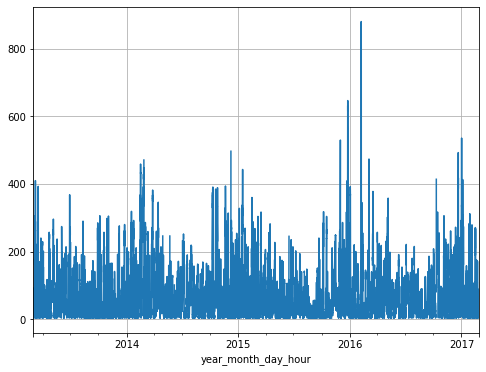

In [15]:
# Lets plot pm2.5 data
pm_data = aq_df['PM2.5']
pm_data.plot(grid = True)

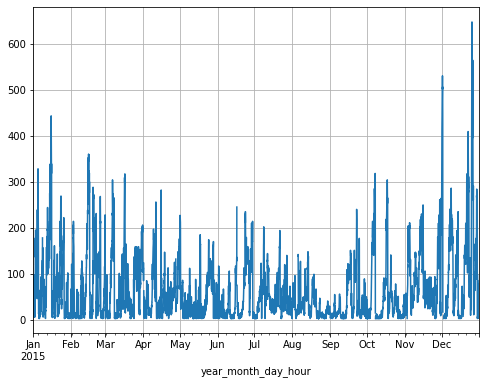

In [16]:
# Lets plot separately to see if there is any seasonality in the data
aq_df_2015 = aq_df.loc['2015']
pm_data_2015 = aq_df_2015['PM2.5']
pm_data_2015.plot(grid = True)

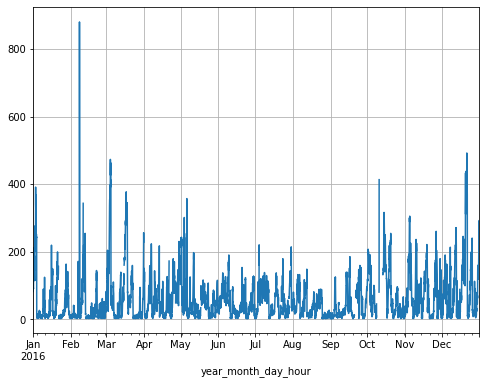

In [17]:
# It can be observed in both the years that pm2.5 is min in June-sep with spikes on both the sides
aq_df_2016 = aq_df.loc['2016']
pm_data_2016 = aq_df_2016['PM2.5']
pm_data_2016.plot(grid = True)

In [18]:
# Instead of taking these years, we can make an interactive graph
import plotly.express as px
fig = px.line(aq_df_non_indexed, x = 'year_month_day_hour',y = 'PM2.5',title = 'PM2.5 with slider')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1y',step='year',stepmode = "backward"),
                        dict(count = 2,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 3,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [19]:
# Plotting temp with years
# We can see a clear pattern with temprature
# It seems like additive seasonality with no trend, but lets see
fig = px.line(aq_df_non_indexed, x = 'year_month_day_hour',y = 'TEMP',title = 'TEMP with slider')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1y',step='year',stepmode = "backward"),
                        dict(count = 2,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 3,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

Text(0.5, 1.0, 'Air qulaity 2014 and 2015')

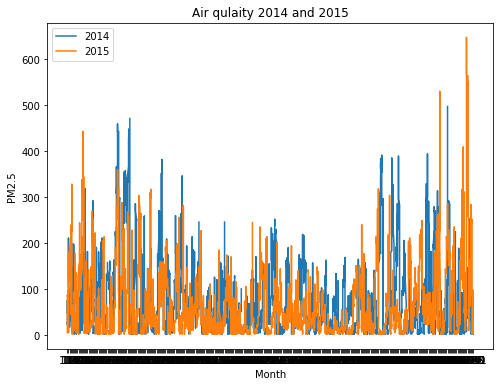

In [20]:
# As we have too many data points to visualise, we can take x axis at day level
df_2014 = aq_df['2014'].reset_index()
df_2015 = aq_df['2015'].reset_index()

df_2014['month_day_hour'] = df_2014.apply(lambda x : str(x['month'])+"."+str(x['day']),axis = 1)
df_2015['month_day_hour'] = df_2015.apply(lambda x : str(x['month'])+"."+str(x['day']),axis = 1)

plt.plot(df_2014['month_day_hour'],df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'],df_2015['PM2.5'])

plt.legend(['2014','2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')

plt.title('Air qulaity 2014 and 2015')

In [21]:
# Lets check out monthly stats of pm2.5 in 2014-15 (because only these years have data for all 12 months)
# This representation makes clear if the intution we are getting from graph is true or not
# As observed, mean is comming down in jun-sep
aq_df['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

# Bi-variate Analysis

In [22]:
# We can also observe stats for more than one feature as below
aq_df['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['min','max'],'TEMP':['min','max']})

PM2.5         TEMP      
        min    max   min   max
month                         
1       3.0  443.0 -16.6  12.4
2       3.0  881.0 -10.9  14.0
3       3.0  474.0  -6.4  26.0
4       3.0  346.0   1.3  32.0
5       3.0  358.0   7.0  41.4
6       3.0  245.0  15.1  38.1
7       3.0  252.0  16.8  39.2
8       3.0  217.0  16.6  36.3
9       3.0  240.0   7.8  34.5
10      3.0  414.0  -1.4  28.1
11      3.0  394.0 -10.3  20.8
12      3.0  647.0  -9.7  11.6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f505c971390>,
      dtype=object)

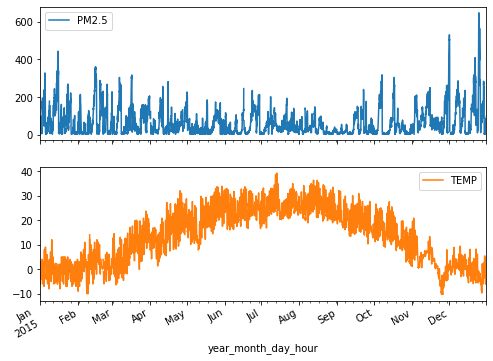

In [23]:
# Use df.plot(subplot=True) to get subplots for more than one features
aq_df_2015 = aq_df['2015']
pm_data_2015 = aq_df_2015[['PM2.5','TEMP']]
pm_data_2015.plot(subplots = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5059d7b208>,
      dtype=object)

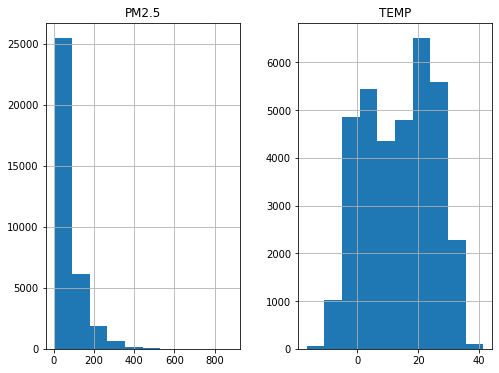

In [24]:
# Histograms help us know the value range of our features better
aq_df[['PM2.5','TEMP']].hist()

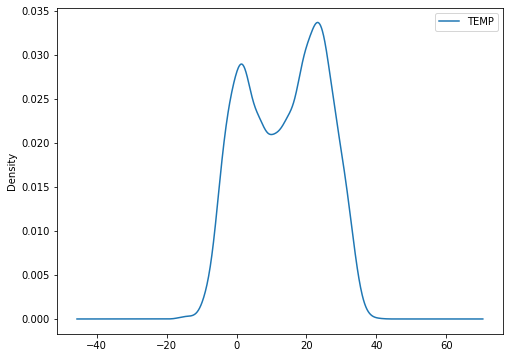

In [25]:
# In case of temprature, it feels like we are looking at a bell curve, but thats not the case
# This is known as "Bimodal distribution" - distribution with two peaks, can be beter visualized if we use density kernel
aq_df[['TEMP']].plot(kind = 'density')

# Auto-correlation analysis

## Lag Plots

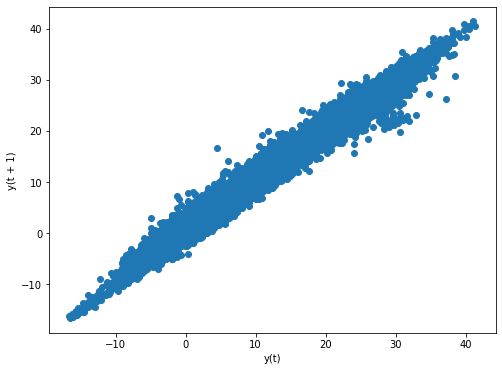

In [26]:
pd.plotting.lag_plot(aq_df['TEMP'],lag =1)
# lag plot is a special type of lag scatter plot where x axis is the cuurent time and the y axis is th elag perios
# by default lag period is 1
# For a one hour lag we can see that the auto-correlation is pretty much linear

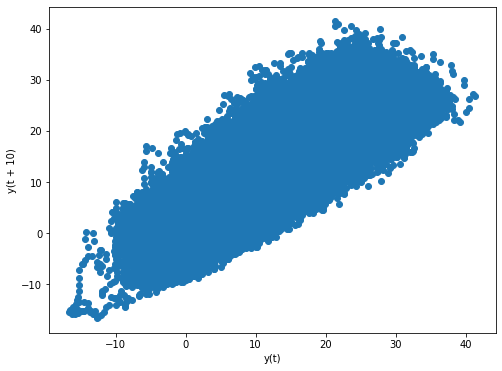

In [27]:
# For 10 hours lag data is not very much linerly autocorrelated
pd.plotting.lag_plot(aq_df['TEMP'],lag =10)

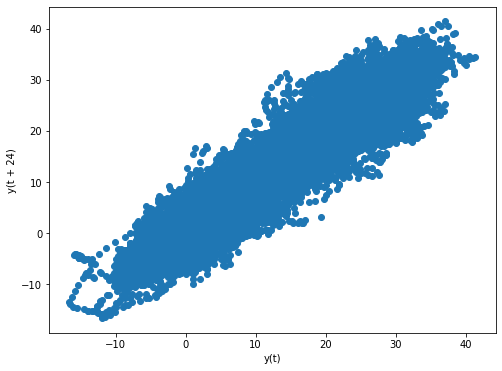

In [28]:
pd.plotting.lag_plot(aq_df['TEMP'],lag =24)

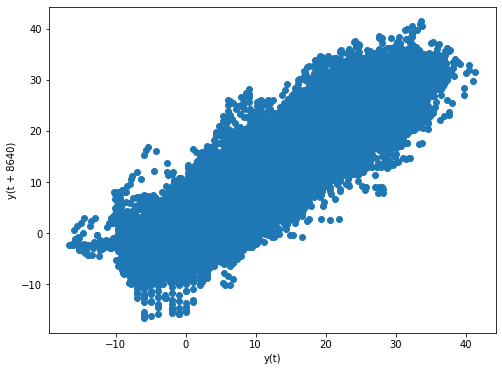

In [29]:
# 8640 hours is one year, and hence a linear graph is expected
pd.plotting.lag_plot(aq_df['TEMP'],lag =8640)

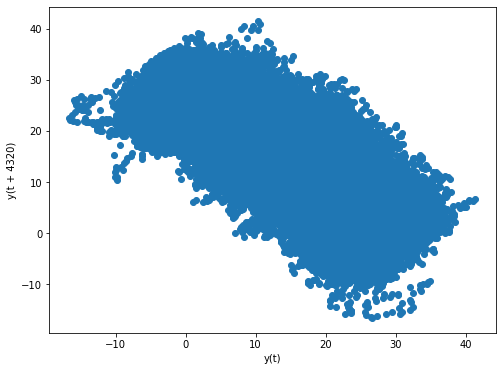

In [30]:
# For a period of 6 months, there is a complete change of season in asian countries
# i.e. if temp is min now, it would probably be the max 6 months later
pd.plotting.lag_plot(aq_df['TEMP'],lag =4320) #negative correlation

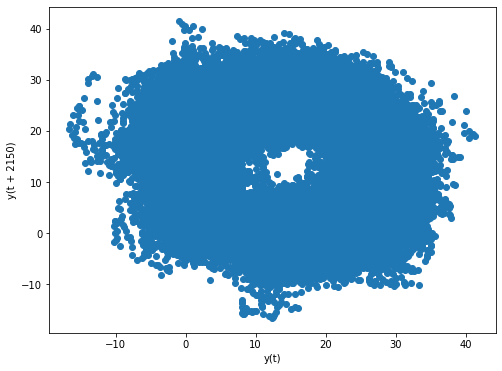

In [31]:
# Looking 3 months ahead gives no correlation at all
pd.plotting.lag_plot(aq_df['TEMP'],lag =2150) #no correlation

## Autocorrelation Plots


In [32]:
# For doing autocorrelation analysis we will remove the null values
# once we get the autocorrelation we will get a better idea of how to replace null values
aq_df_na = aq_df.copy()
aq_df_na = aq_df_na.dropna()

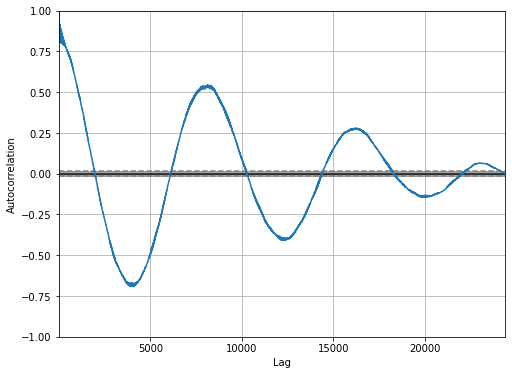

In [33]:
# We can see that there is a positive peak at 12 months lag and negative peak at 6 months lag
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

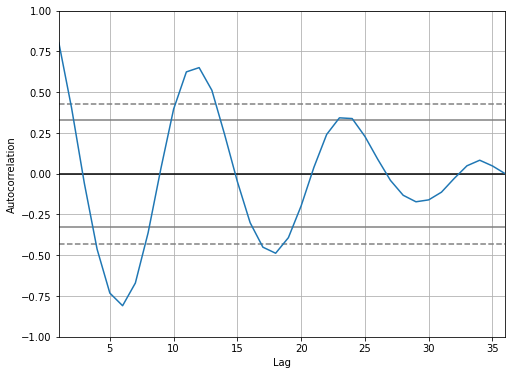

In [34]:
# We can resample the data to 1 month, by taking mean of all the data in the month
# 1d- day wise resampling
# 1y - year wise resampling
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample('1m').mean())
# The dark and dotted lines show 90% and 95% confidence levels respectively
# correlation at 12 months is crossing 95% confidence level, which means that there is a strong correlation

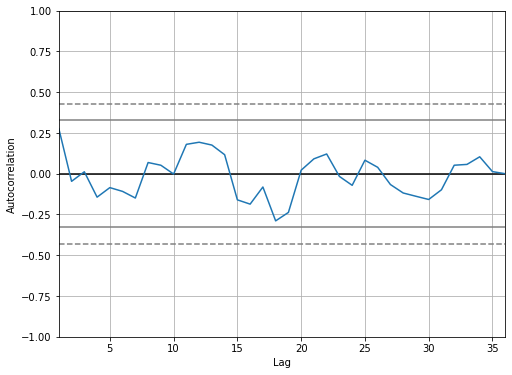

In [35]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['PM2.5'].resample('1m').mean())
# There is no very strong correlation as no where its crossing 90% confidence interval
# But there is somehow a up and down trend

# Multi-Variate Anaysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f505c43fcf8>,
      dtype=object)

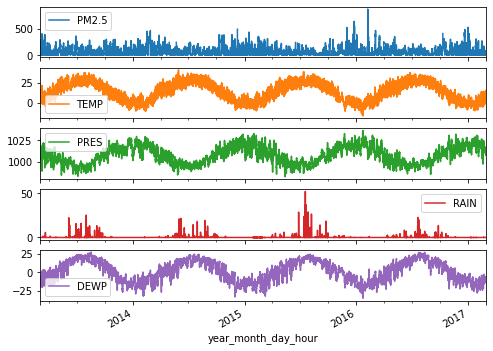

In [36]:
# Its safe to say that pm2.5 and rain are not correlated much
# Temprature and presure, dewp and pressure have negative correation
# pm2.5 seems to increase with pressure
multi_data = aq_df[['PM2.5','TEMP','PRES','RAIN','DEWP']]
multi_data.plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f505c2fb908>,
      dtype=object)

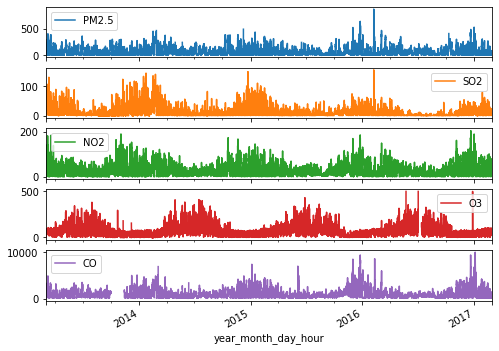

In [37]:
# we can see that pm2.5, so2, NO2 and CO are all somehow correlated
multi_data = aq_df[['PM2.5','SO2','NO2','O3','CO']]
multi_data.plot(subplots = True)

Text(0.5, 0, 'year_month_day_hour')

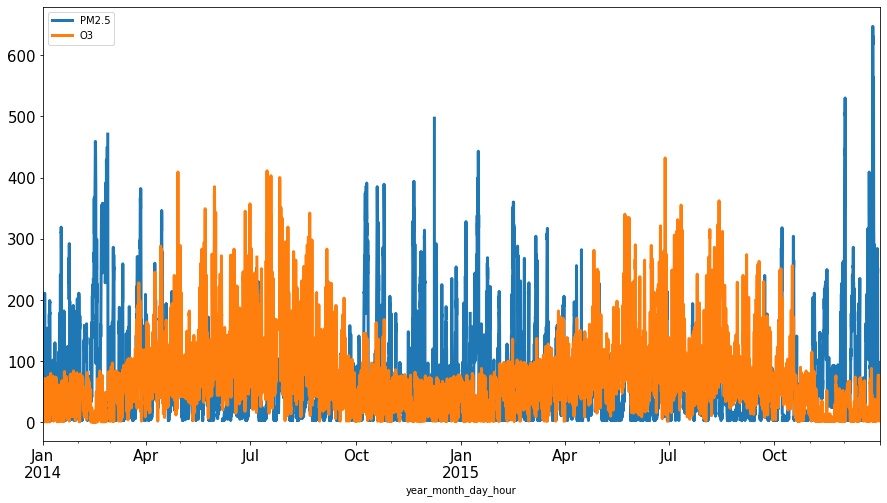

In [38]:
# We can observe above that ozone and pm2.5 are mutually exclusive, but we can check that by plotting them one over other
aq_df['2014':'2015'][['PM2.5','O3']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.xlabel('year_month_day_hour')
# I think there is a negative correlation but not very sure

## Correlations between features

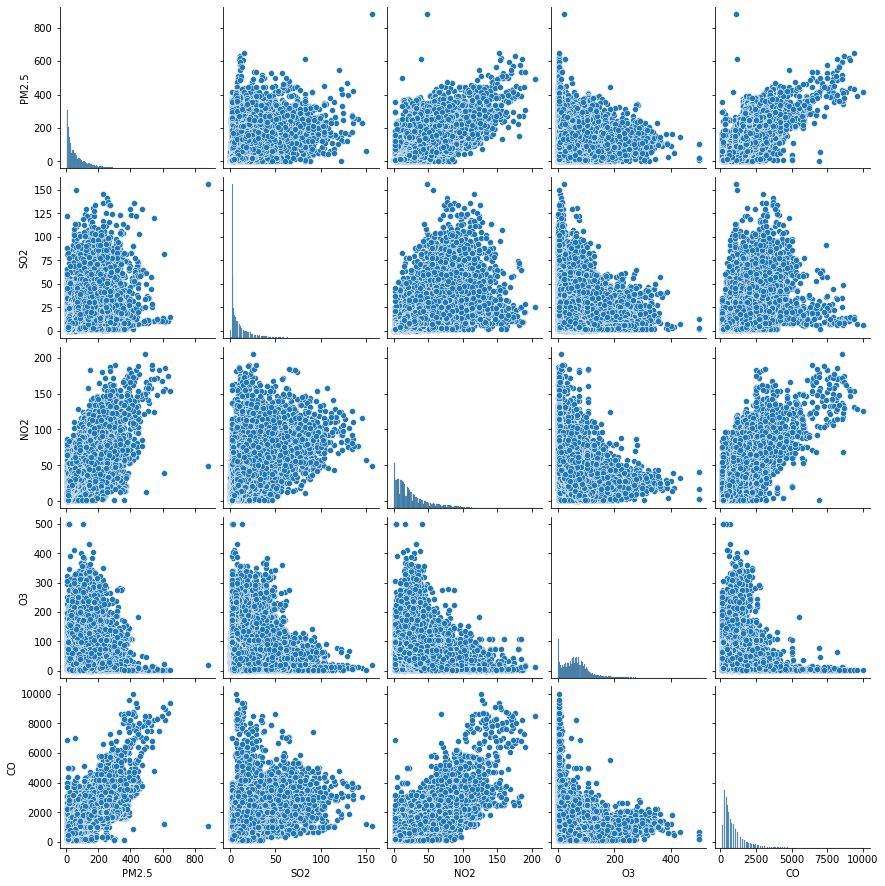

In [39]:
# Pairwise correlation
g = sns.pairplot(aq_df[['PM2.5','SO2','NO2','O3','CO']])

In [40]:
# Air particles xorrelation matrics
aq_corr = aq_df[['PM2.5','SO2','NO2','O3','CO']].corr(method = 'pearson')
aq_corr

,PM2.5,SO2,NO2,O3,CO
PM2.5,1.000000,0.475117,0.718170,-0.100542,0.802737
SO2,0.475117,1.000000,0.610433,-0.182096,0.529182
NO2,0.718170,0.610433,1.000000,-0.373625,0.798753
O3,-0.100542,-0.182096,-0.373625,1.000000,-0.303275
CO,0.802737,0.529182,0.798753,-0.303275,1.000000


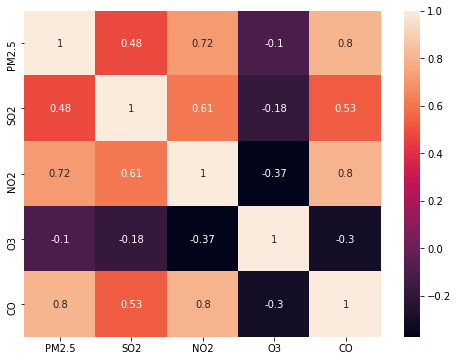

In [41]:
sns.heatmap(aq_corr,annot=True)

In [42]:
# Lets see that if wind direction (wd) has correlation with pm2.5 (mean, median, max, min)
wd_pm = aq_df.groupby('wd').agg(median=('PM2.5','median'),mean=('PM2.5','mean'),max=('PM2.5','max'),min=('PM2.5','min')).reset_index()
wd_pm
# maybe when wind direction is in east - pm is higher, lower when wd is north

,wd,median,mean,max,min
0,E,70.0,88.623363,434.0,3.0
1,ENE,56.5,77.685514,647.0,3.0
2,ESE,78.5,96.492276,632.0,3.0
3,N,29.0,57.546221,536.0,3.0
4,NE,32.0,57.390083,530.0,3.0
5,NNE,26.0,53.946239,881.0,3.0
6,NNW,33.0,62.790775,548.0,3.0
7,NW,21.0,52.769116,535.0,3.0
8,S,52.0,72.497281,511.0,3.0
9,SE,70.0,85.045709,617.0,3.0
